In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## CHARGEMENT DES DONNÉES

In [40]:
df = pd.read_csv('../../results_associativity.csv')

df.head()

,op1,op2,repetition,seed,a,b,NombreReussites,NombreEssais,PourcentageReussites
0,(x + y) + z,x + (y + z),10,0,-1,1,10,10,100.0
1,(x + y) + z,x + (y + z),10,0,-1,5,7,10,70.0
2,(x + y) + z,x + (y + z),10,0,-1,10,6,10,60.0
3,(x + y) + z,x + (y + z),10,0,-1,20,7,10,70.0
4,(x + y) + z,x + (y + z),10,0,-1,50,7,10,70.0


## SÉPARATION TRAIN / TEST

In [41]:
X = df[["seed","repetition","a","b"]]
y = df["PourcentageReussites"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



## TRAINING DU DECISION TREE

In [42]:
model1 = DecisionTreeRegressor(max_depth=3, random_state=0)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))


MSE : 33.754123205154094
R2  : 0.38536836674806896


In [43]:
model2 = DecisionTreeRegressor(max_depth=4, random_state=0)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))

MSE : 33.92782828444841
R2  : 0.3822053565302679


## VISUALISATION DES ARBRES

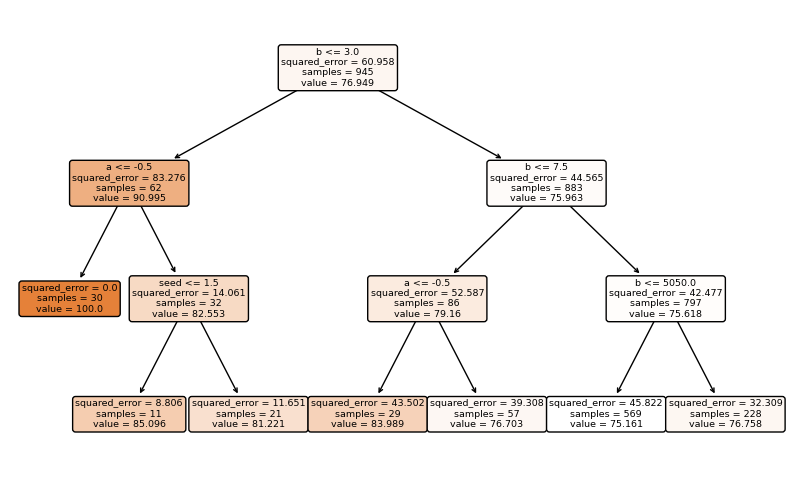

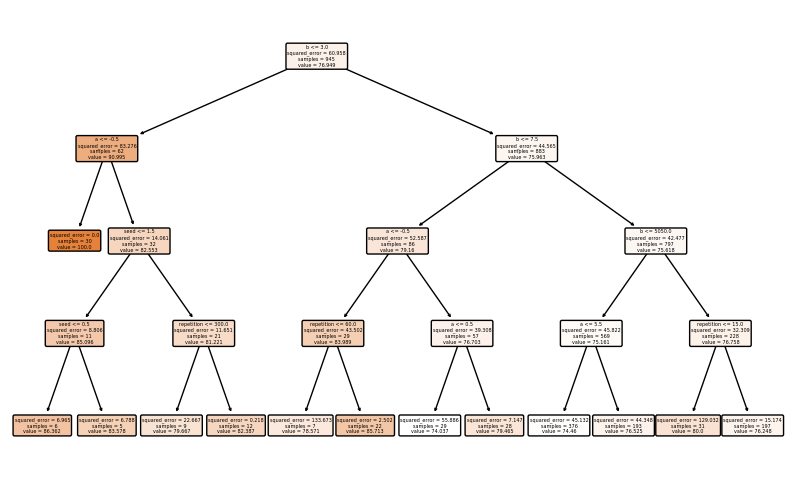

In [44]:
plt.figure(figsize=(10,6))
plot_tree(model1, feature_names=X.columns, filled=True, rounded=True)
plt.show()

plt.figure(figsize=(10,6))
plot_tree(model2, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## RÈGLES TEXTUELLES (interprétables)

In [45]:
rules = export_text(model1, feature_names=list(X.columns))
print(rules)

|--- b <= 3.00
|   |--- a <= -0.50
|   |   |--- value: [100.00]
|   |--- a >  -0.50
|   |   |--- seed <= 1.50
|   |   |   |--- value: [85.10]
|   |   |--- seed >  1.50
|   |   |   |--- value: [81.22]
|--- b >  3.00
|   |--- b <= 7.50
|   |   |--- a <= -0.50
|   |   |   |--- value: [83.99]
|   |   |--- a >  -0.50
|   |   |   |--- value: [76.70]
|   |--- b >  7.50
|   |   |--- b <= 5050.00
|   |   |   |--- value: [75.16]
|   |   |--- b >  5050.00
|   |   |   |--- value: [76.76]



On remarque que les valeurs de a et b (les bornes de notre experience) sont les éléments qui ont le plus d'impacts sur les résultats obtenus. En effet, il semble que plus la valeur de la borne b est grande moins les résultats de l'experience sont bons mais plus ils sont stables. La borne a semble aussi avoir un impact sur les résultats obtenus. Plus généralement, c'est l'intervalle choisi pour tirer les nombres x,y et z qui ont un impact sur les résultats de l'exeprience.

On remarque, comme on pouvait s'y attendre que la seed de l'aléatoire peut aussi avoir un léger impact sur les résultats obtenus. 

Le nombre de répétition lui semble, dans notre arbre, avoir moins d'impact que ce que l'on aurait pu imaginer. Il n'apparait pas dans le modèle utilisant une profondeur de 3. Cela peut s'expliquer par le fait que les résultats se stabilisent assez rapidement avec cette experience. Cependant dans l'arbre à 4 étages on remarque tout de même que les experiences avec le plus de répétitions ont de meilleurs résultats.


Il faut cependant nuancer cette analyse car le modèle proposé n'explique que 38% de la variance ce qui est faible. Il reste meilleur que de prédire la moyenne ce qui nous permet d'obtenir des premières indications mais ce modèle ne permet pas de conclure clairement sur l'impact des variables.